#AULA 1

#Introdução
Nesse trecho vamos só mostra que o google.colab (%notebook) interpreta/roda código de python.


In [1]:
print ("Gilberto Raitz")
print ("aula de data science alura - QUARENTENADOS")

Gilberto Raitz
aula de data science alura - QUARENTENADOS


importação de bibliotecas a serem usadas no notebook.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregando os Arquivos

Foi carregado dados referente a avaliações de filmes do site https://grouplens.org/datasets/movielens/

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-01/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#para carregar direto do repositorio o mesmo tem que estar em dominio publico.
filmes.columns = ["filmeid", "titulo", "genero"]
filmes.head()

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-01/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
avaliacoes.shape

(100836, 4)

Renomenando as colunas do dado.

In [7]:
avaliacoes.columns = ["userarioid", "filmeid", "nota", "momento"]
avaliacoes.head()

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Avalições estatísticas dos dados.


In [8]:
avaliacoes.describe()

,userarioid,filmeid,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [10]:
avaliacoes.query("filmeid==1").describe()

,userarioid,filmeid,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [11]:
avaliacoes.query("filmeid==1")["nota"].mean()

3.9209302325581397

In [12]:
avaliacoes.query("filmeid==1").mean()

userarioid    3.065302e+02
filmeid       1.000000e+00
nota          3.920930e+00
momento       1.129835e+09
dtype: float64

Extraindo variavel de um unico filme para poder avaliar separadamente

In [0]:
#o code não esta organizado, de uma forma mais correta seria extrair a variavel filme um e fazer todas as avalizaçoes deste filme separadamente 

In [14]:
avaliacoes_filme_1 = avaliacoes.query("filmeid==1")
avaliacoes_filme_1.head()

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [15]:
notas_medias_por_filme = avaliacoes.groupby("filmeid")["nota"].mean()
#notas_medias_por_filme.head()
notas_medias_por_filme

filmeid
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [16]:
filmes

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
#para unir a tabela (nome do filme) com a média se faz a pergunta, será que todos os filmes obtiveram votação?

In [0]:
#filmes["nota_media"] = notas_medias_por_filme
#filmes.head()
#assumindo que os numeros de linhas batem entre os title e nota_media e a ordem é a mesma.
#não quero correr o risco de amanha os fimes não estarem em quantidade exata e ter que alterar o dataset

#DESAFIO 1
Encontre quais filmes não possuem notas

In [19]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeid")
filmes_com_media.head()

,filmeid,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [20]:
filmes_com_media.sort_values("nota")

,filmeid,titulo,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#DESAFIO 02
Mudar o nome da coluna para média apos o join.


In [21]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeid,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


#DESAFIO 03
Colocar quantos avaliaçoes tiveram cada filme


In [22]:
avaliacoes.query("filmeid in [1,2,102084]")

,userarioid,filmeid,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


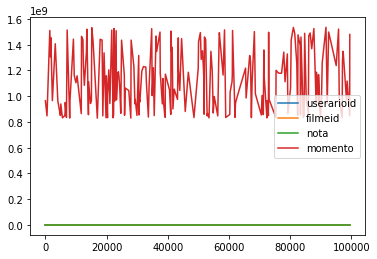

In [23]:
avaliacoes.query("filmeid == 1").plot()

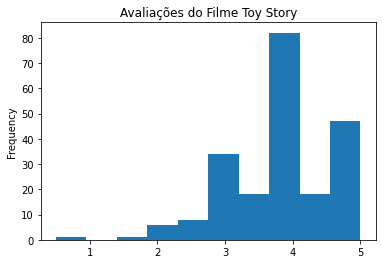

In [24]:
avaliacoes.query("filmeid == 1")['nota'].plot(kind='hist', title='Avaliações do Filme Toy Story')
#plt.title("Avaliação do Filme Toy Story")
#plt.show()

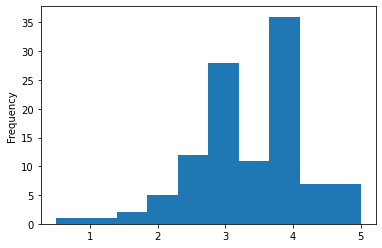

In [25]:
avaliacoes.query("filmeid == 2")['nota'].plot(kind='hist')

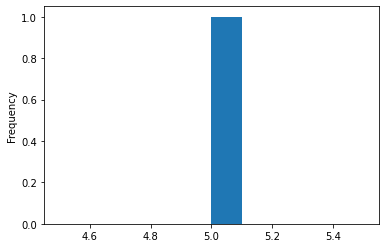

In [26]:
avaliacoes.query("filmeid == 102084")['nota'].plot(kind='hist')

#DESAFIOS 4 - 7

04 - Arredondar as medias (coluna de nota média) para duas casas decimais
05 - Descobrir os generos dos filmes (quais são eles, unicos) (esse aqui o bicho pega)
06 - Contar o numero de aparições de cada genero
07 - Plotar o grafico de aparições de cada genero. Pode ser um grafico de tipo igua a barra.

#AULA 2 

Inicio da aula quarentenaDados.


In [27]:
filmes["genero"].str.get_dummies("|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
filmes["genero"].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [29]:
filmes["genero"].str.get_dummies("|").sum(axis=1)

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

In [30]:
filmes["genero"].str.get_dummies("|").sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [31]:
filmes["genero"].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [32]:
filmes["genero"].str.get_dummies("|").sum().sort_values()

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

In [33]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
#este dado é uma serie porque tem apenas uma coluna, pois a chamada drama, comedy e etc é o index da tambela

In [35]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [36]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [37]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [38]:
filmes["genero"].str.get_dummies("|").sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

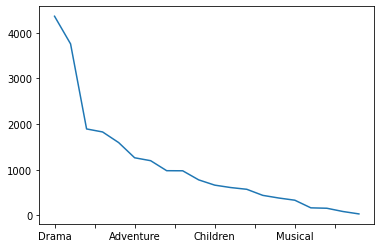

In [39]:
#não faz sentido nenhum para demostrar os dados
 filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).plot()

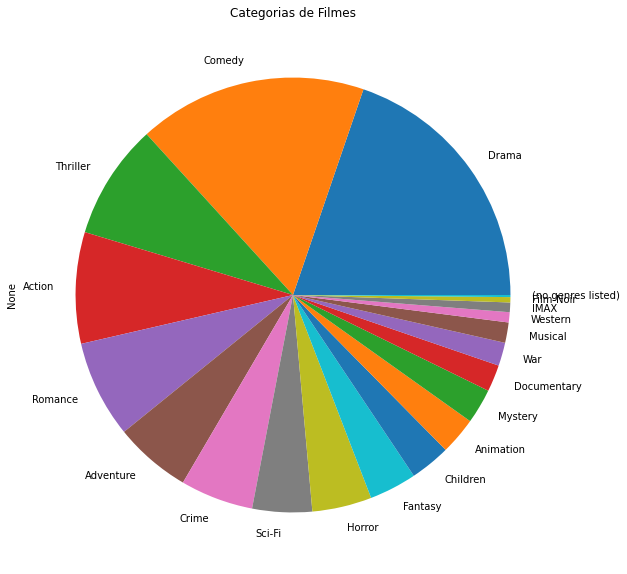

In [40]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de Filmes',
    figsize=(10,10))

In [0]:
#nunca me entregue um dado de pizza, o cerebro não e feito para entregar um dado de area, comparando a area de comedia com drama

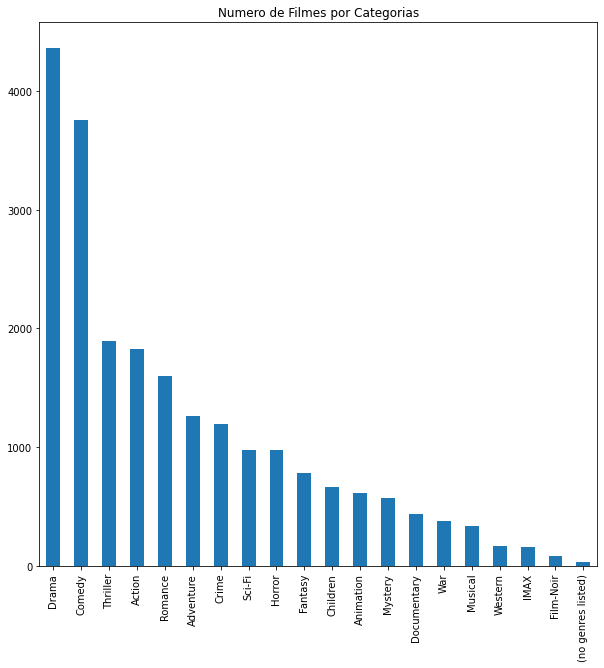

In [42]:
filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Numero de Filmes por Categorias',
    figsize=(10,10),)
plt.show()

In [43]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<function matplotlib.pyplot.show>

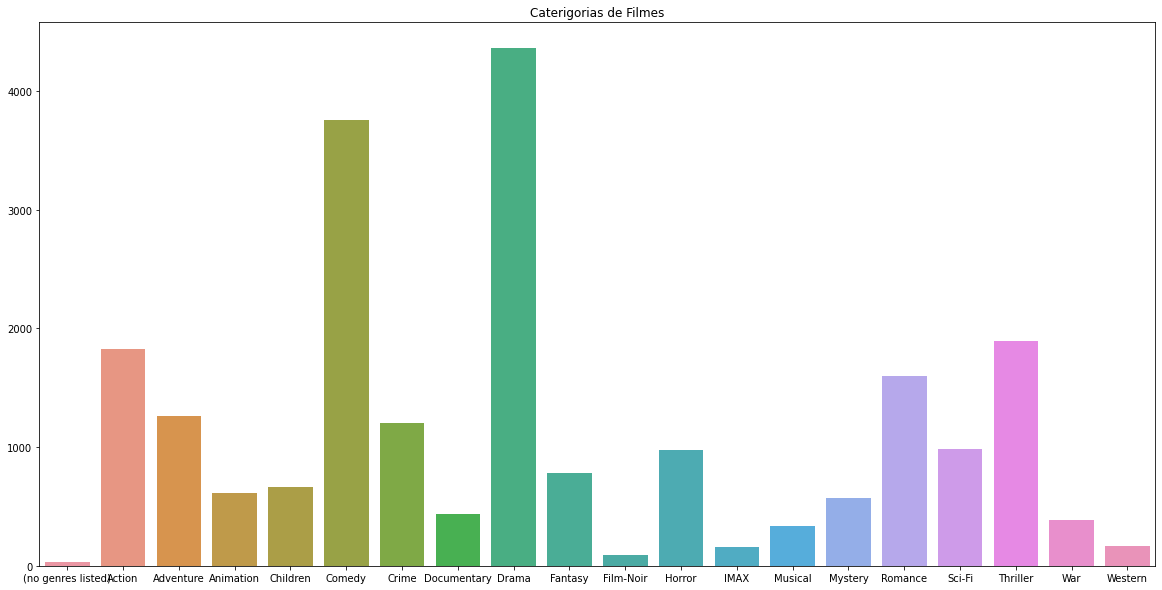

In [44]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_index()
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show

<function matplotlib.pyplot.show>

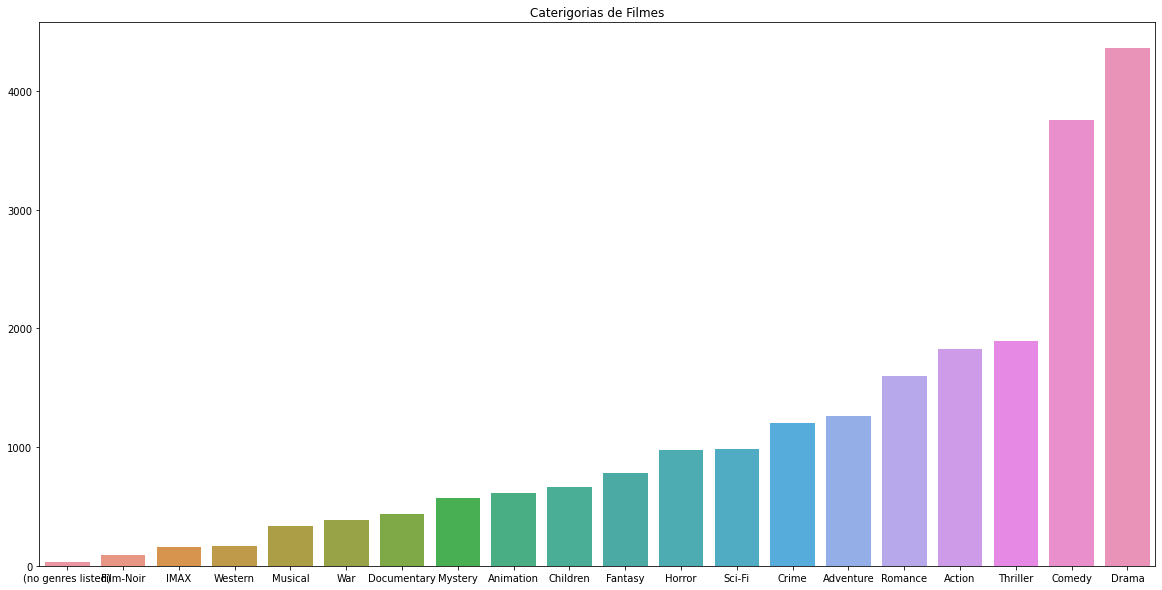

In [45]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values()
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show

<function matplotlib.pyplot.show>

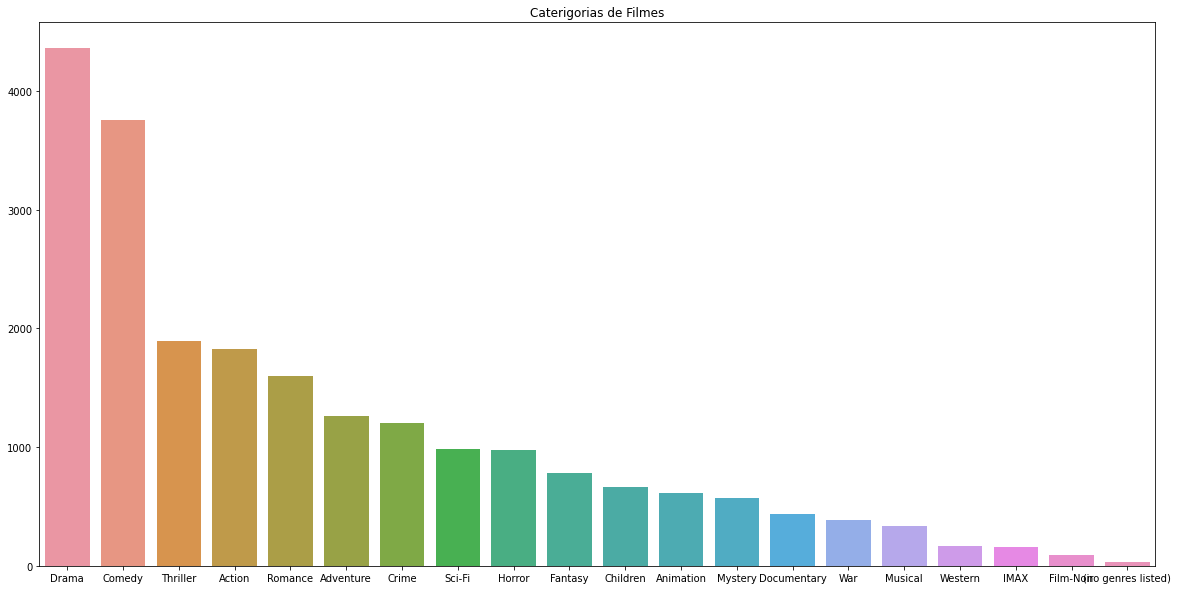

In [46]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show

<function matplotlib.pyplot.show>

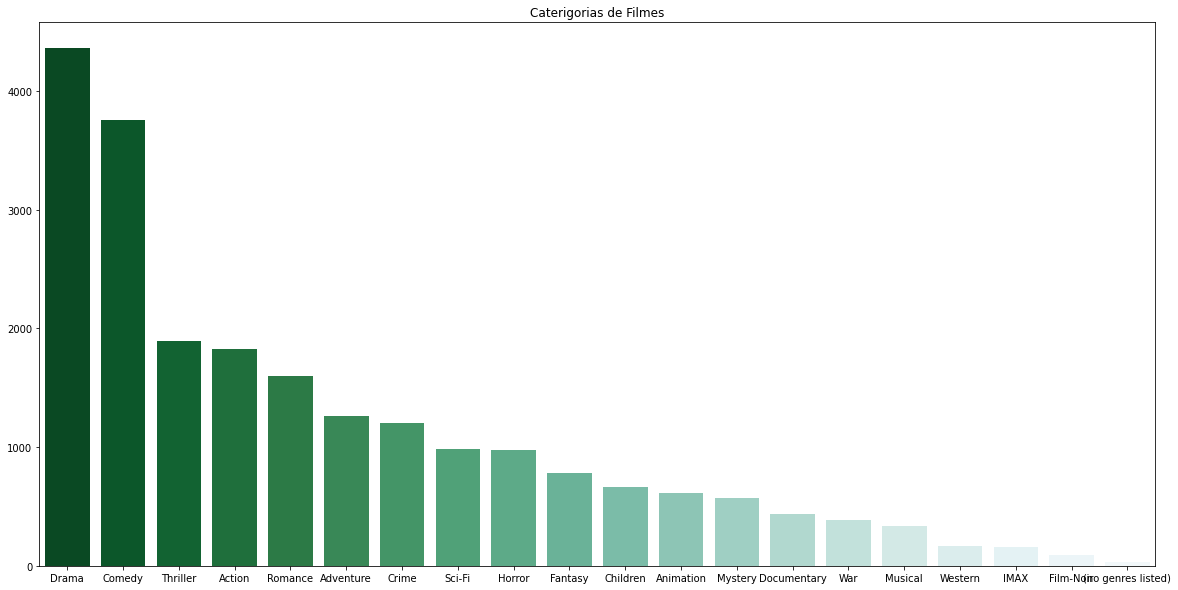

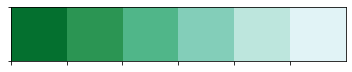

In [47]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)))
sns.palplot(sns.color_palette("BuGn_r"))
plt.show

<function matplotlib.pyplot.show>

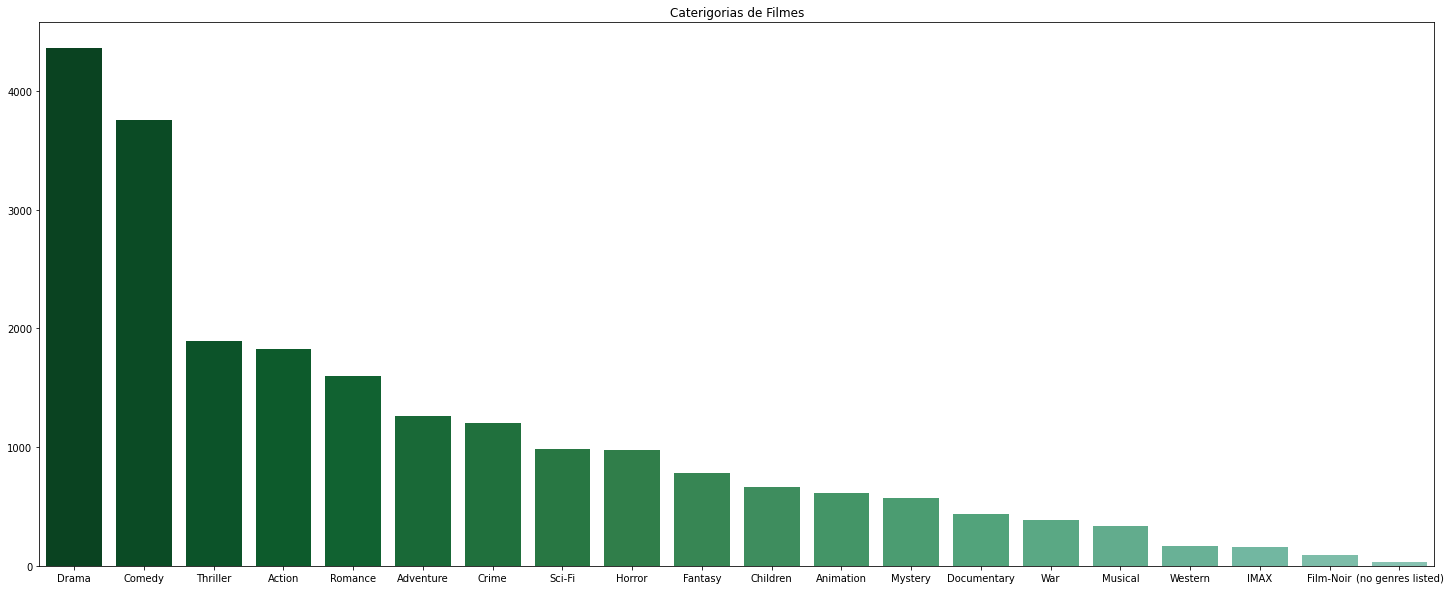

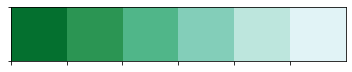

In [48]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(25,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+15))
sns.palplot(sns.color_palette("BuGn_r"))
plt.show

<function matplotlib.pyplot.show>

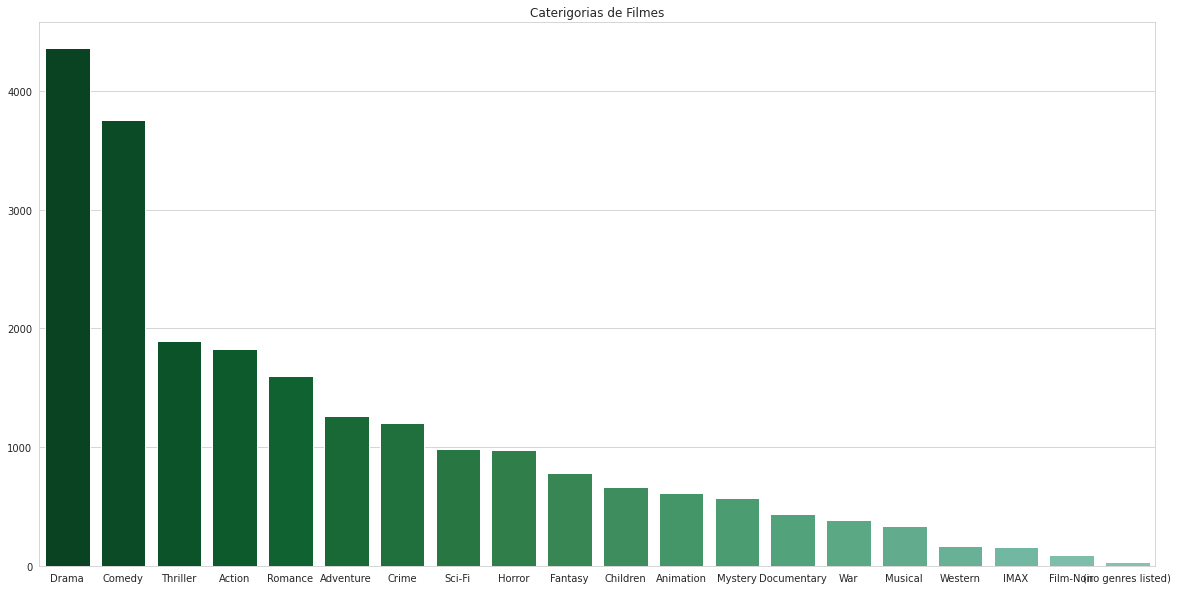

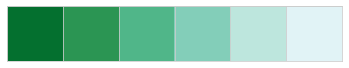

In [49]:
filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.title("Caterigorias de Filmes")
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+15))
sns.palplot(sns.color_palette("BuGn_r"))
plt.show

#DESAFIO 1

Rotacionar os thincks (os noems dos generos) 

3.9209302325581397


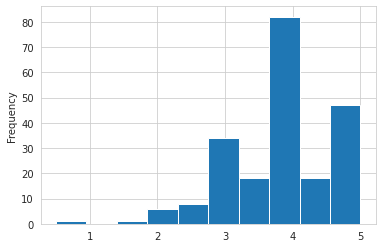

In [50]:
avaliacoes_filme_1 = avaliacoes.query("filmeid==1")["nota"]
print(avaliacoes_filme_1.mean())
avaliacoes_filme_1.plot(kind="hist")
plt.show()

3.4318181818181817


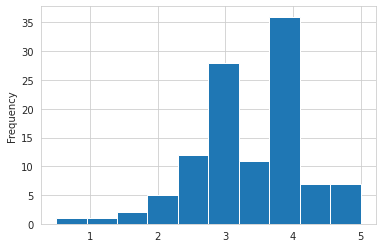

In [51]:
avaliacoes_filme_2 = avaliacoes.query("filmeid==2")["nota"]
print(avaliacoes_filme_2.mean())
avaliacoes_filme_2.plot(kind="hist")
plt.show()

In [52]:
avaliacoes_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [53]:
avaliacoes_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [54]:
filmes_com_media.sort_values("nota", ascending=False)[2000:2500]

,filmeid,titulo,genero,nota
6139,43914,Winter Passing (2005),Drama,4.000000
1386,1900,"Children of Heaven, The (Bacheha-Ye Aseman) (1...",Comedy|Drama,4.000000
1387,1902,Dream for an Insomniac (1996),Drama|Romance,4.000000
5889,33237,San Francisco (1936),Drama|Musical|Romance,4.000000
5827,32234,Julia (1977),Drama,4.000000
...,...,...,...,...
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama,3.883117
1230,1635,"Ice Storm, The (1997)",Drama,3.882353
225,261,Little Women (1994),Drama,3.880952
701,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,3.880435


In [0]:
def plot_filme(n):
    avaliacoes_filme = avaliacoes.query(f"filmeid=={n}")["nota"]
    avaliacoes_filme.plot(kind="hist")
    return avaliacoes_filme.describe()

count    11.000000
mean      3.454545
std       0.722999
min       2.000000
25%       3.000000
50%       3.500000
75%       3.750000
max       4.500000
Name: nota, dtype: float64

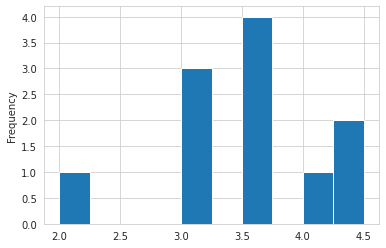

In [56]:
plot_filme(6242)

#DESAFIO 2

Comparar filmes com notas parecidas com destribuiçoes diferentes

In [0]:
def plot_filme(n):
    avaliacoes_filme = avaliacoes.query(f"filmeid=={n}")["nota"]
    avaliacoes_filme.plot(kind="hist")
    plt.show()
    avaliacoes_filme.plot.box()
    plt.show()
    return avaliacoes_filme.describe()

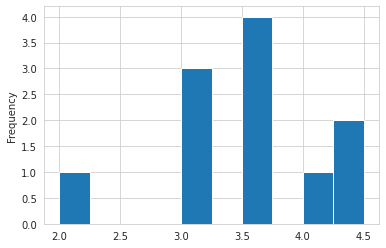

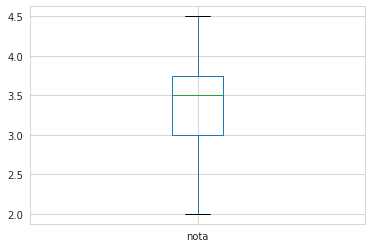

count    11.000000
mean      3.454545
std       0.722999
min       2.000000
25%       3.000000
50%       3.500000
75%       3.750000
max       4.500000
Name: nota, dtype: float64

In [58]:
plot_filme(6242)

In [0]:
#traço superior max value
#traço inferior min value
#reta no dentro do retangulo mediana
#retangulo superior 75%
#retangulo inferior 25%
#biblioteca panda e max e min

#desafio 3

Pegar os 10 filmes com mais votos e fazer a os boxplots

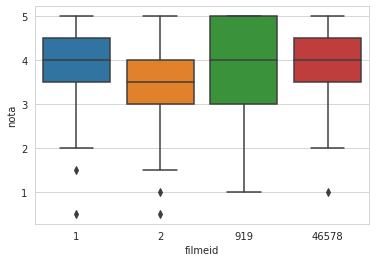

In [60]:
sns.boxplot(data = avaliacoes.query("filmeid in [1,2,919,46578]"), x="filmeid", y="nota")

#DESAFIO 4

O boxplot estar em um tamanho adequado e com os nomes dos filmes dos thicks

#DESAFIO 5 

Calcular moda, media e mediana dos filmes. Explore filmes com notas mais proximas de 0,5, 1, 3 e 5.

#DESAFIO 6

Plotar o bloxplot e o histograma um lado do outro (na mesma figura ou em figuras distintas)

#DESAFIO 7 

Grafico de notas médias por ano
dica: possui series que não possuem ano



#AULA 3


In [61]:
imdb = pd.read_csv("https://raw.githubusercontent.com/graitz/alura-data-science/master/aula-03/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [62]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [63]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [64]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [65]:
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Tony Maylam          1
Bruce Hunt           1
Zak Penn             1
Gordon Chan          1
Robert Cary          1
Name: director_name, Length: 2398, dtype: int64

In [66]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [67]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

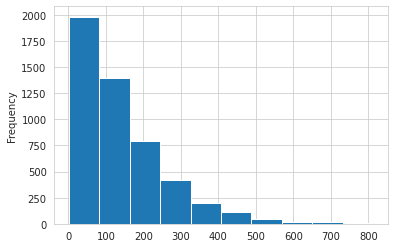

In [68]:
imdb["num_critic_for_reviews"].plot(kind="hist")

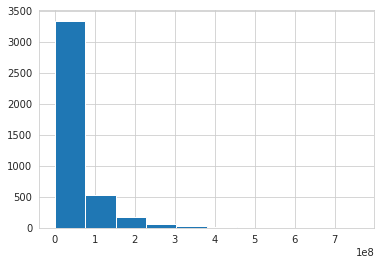

In [69]:
imdb["gross"].hist()

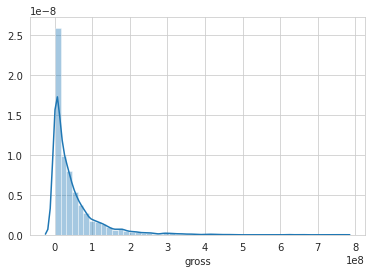

In [70]:
import seaborn as sns

sns.distplot(imdb["gross"])

In [71]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [72]:
imdb.sort_values("gross", ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4908,Color,Eric Valette,42.0,94.0,2.0,156.0,Ryan Kennedy,259.0,NaN,Horror|Sci-Fi|Thriller,Melanie Papalia,Super Hybrid,1328,711,John Reardon,0.0,based on comic book|blue bra and panties|femal...,http://www.imdb.com/title/tt1152827/?ref_=fn_t...,22.0,English,USA,PG-13,13000000.0,2010.0,165.0,3.9,2.35,0
3411,Color,Michael Corrente,41.0,99.0,30.0,209.0,Tony Devon,480.0,398420.0,Crime|Drama,Jerry Ferrara,Brooklyn Rules,5049,1234,Alexa Havins,3.0,1980s|friend|friendship|loyalty|mafia,http://www.imdb.com/title/tt0283503/?ref_=fn_t...,48.0,English,USA,R,8000000.0,2007.0,257.0,6.4,2.35,226
1068,Color,Jimmy Hayward,178.0,81.0,39.0,364.0,Billy Blair,13000.0,10539414.0,Action|Drama|Fantasy|Thriller|Western,Michael Fassbender,Jonah Hex,45729,14619,Julia Jones,1.0,confederate|death|independence day|military|te...,http://www.imdb.com/title/tt1075747/?ref_=fn_t...,176.0,English,USA,PG-13,47000000.0,2010.0,541.0,4.7,2.35,0
1199,Color,David Zucker,151.0,89.0,119.0,807.0,Carmen Electra,2000.0,90703745.0,Comedy,Beau Mirchoff,Scary Movie 4,93748,5855,Regina Hall,8.0,female nudity|male nudity|parody|reference to ...,http://www.imdb.com/title/tt0362120/?ref_=fn_t...,410.0,English,USA,PG-13,45000000.0,2006.0,869.0,5.1,1.85,1000
2271,Color,Mark Mylod,151.0,117.0,20.0,783.0,Ari Graynor,11000.0,13987482.0,Comedy|Romance,Chris Evans,What's Your Number?,58957,15713,Ed Begley Jr.,1.0,ex boyfriend|morning after|prince charming|qua...,http://www.imdb.com/title/tt0770703/?ref_=fn_t...,91.0,English,USA,R,20000000.0,2011.0,904.0,6.0,1.85,0
3464,Color,Ernie Barbarash,36.0,104.0,249.0,96.0,Aki Aleong,294.0,NaN,Action|Thriller,Darren Shahlavi,Pound of Flesh,4099,835,Brahim Achabbakhe,0.0,fighting|hand to hand combat|jujitsu|kickboxin...,http://www.imdb.com/title/tt3488328/?ref_=fn_t...,29.0,English,Canada,R,7500000.0,2015.0,284.0,5.1,1.85,0
362,Color,Tony Bancroft,143.0,88.0,7.0,484.0,Harvey Fierstein,2000.0,120618403.0,Adventure|Animation|Family|Fantasy|Musical|War,Ming-Na Wen,Mulan,171792,4478,June Foray,0.0,based on poem|based on true story|china|one wo...,http://www.imdb.com/title/tt0120762/?ref_=fn_t...,222.0,English,USA,G,90000000.0,1998.0,500.0,7.5,1.66,12000
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22124,800,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
2339,Color,Jean-Marie Poiré,8.0,118.0,8.0,11.0,Philippe Nahon,106.0,146072.0,Comedy|Family|Fantasy|Sci-Fi,Christian Clavier,Les couloirs du temps: Les visiteurs II,7147,182,Marie-Anne Chazel,0.0,jewel|knight|magical potion|sequel|time travel...,http://www.imdb.com/title/tt0120882/?ref_=fn_t...,16.0,French,France,NaN,140000000.0,1998.0,56.0,6.0,2.35,136
2073,Color,Jon Cassar,45.0,90.0,78.0,720.0,Landon Liboiron,2000.0,NaN,Drama|Western,Demi Moore,Forsaken,4693,4142,Michael Wincott,1.0,NaN,http://www.imdb.com/title/tt2271563/?ref_=fn_t...,49.0,English,Canada,R,11000000.0,2015.0,1000.0,6.3,2.35,0


## Perguntas Gerais

- aventura tem nota melhor que comédia?
- direto com mais filmes tem nota melhor? tem mais faturamento?
- as respostas sçao específicas para a amostra ou para o mundo?
- quais correlações existem entre os dados?
- bufget x gross (orçamento x faturamento)
- tittle year com algo?


In [73]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)
#eliminei os filmes que não possuem dados de cores

5024

In [74]:
 color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
 color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [75]:
color_or_bw["color_0_ou_1"].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

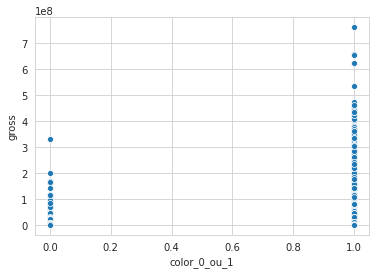

In [76]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

In [77]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [78]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [79]:
color_or_bw.groupby("color").mean()["budget"]

color
 Black and White    1.907756e+07
Color               4.075648e+07
Name: budget, dtype: float64

#Desafio 1
Boxplot de media do colorido e do preto e branco

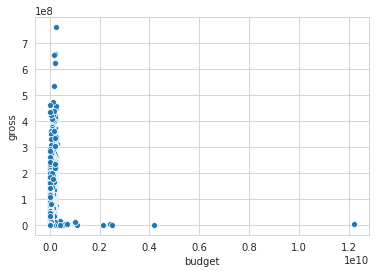

In [80]:
budget_gross = imdb[["budget", "gross"]].dropna()

sns.scatterplot(x="budget", y="gross", data = budget_gross)

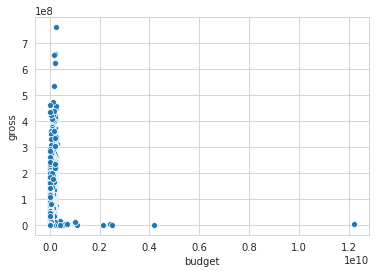

In [81]:
budget_gross = imdb[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

In [82]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [83]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [84]:
imdb = imdb.drop_duplicates("movie_title")
imdb_usa = imdb.query("country =='USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
18,Color,Rob Marshall,448.0,136.0,252.0,1000.0,Sam Claflin,40000.0,241063875.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: On Stranger Tides,370704,54083,Stephen Graham,4.0,blackbeard|captain|pirate|revenge|soldier,http://www.imdb.com/title/tt1298650/?ref_=fn_t...,484.0,English,USA,PG-13,250000000.0,2011.0,11000.0,6.7,2.35,58000


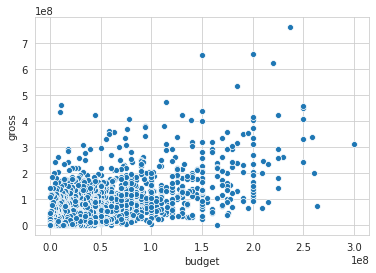

In [85]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")
sns.scatterplot(x="budget", y="gross", data = budget_gross)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


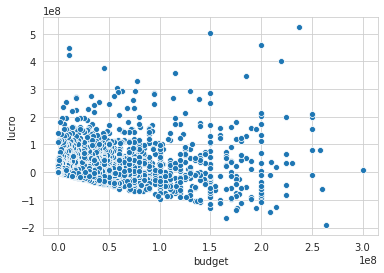

In [86]:
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]
imdb_usa["rasao"] = imdb_usa["gross"] / imdb_usa["budget"]

budget_gross = imdb_usa[["budget", "lucro"]].dropna().query("budget > 0 | lucro > 0")
sns.scatterplot(x="budget", y="lucro", data = budget_gross)

#Desafio

Quem gastou muito e teve o maior prejuizo ? proximo ao 2,5

#Desafio 02

Filme mais recente que tiveram maior prejuizo?



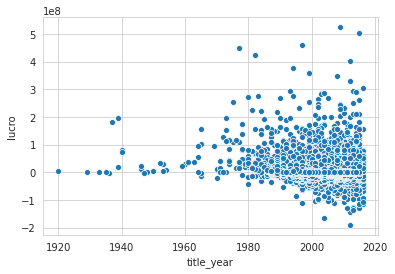

In [87]:
budget_gross = imdb_usa.query("budget >0 | gross >0" )[["title_year", "lucro"]].dropna()
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

#DESAFIO 03

Quem são os filmes pre 2 guerra que ganharam muito dinheiro

In [88]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
filmes_por_diretor.head()
#tipo um dicionario, quero colocar no diretor o valor 24 e etc

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [89]:
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,9.0


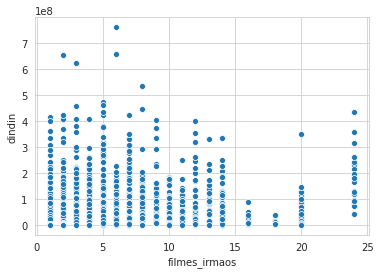

In [90]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

#DESAFIO

Confimar a tese genial do Paulo que o cidadão estranho é o woody allen
colocar o grafico em log

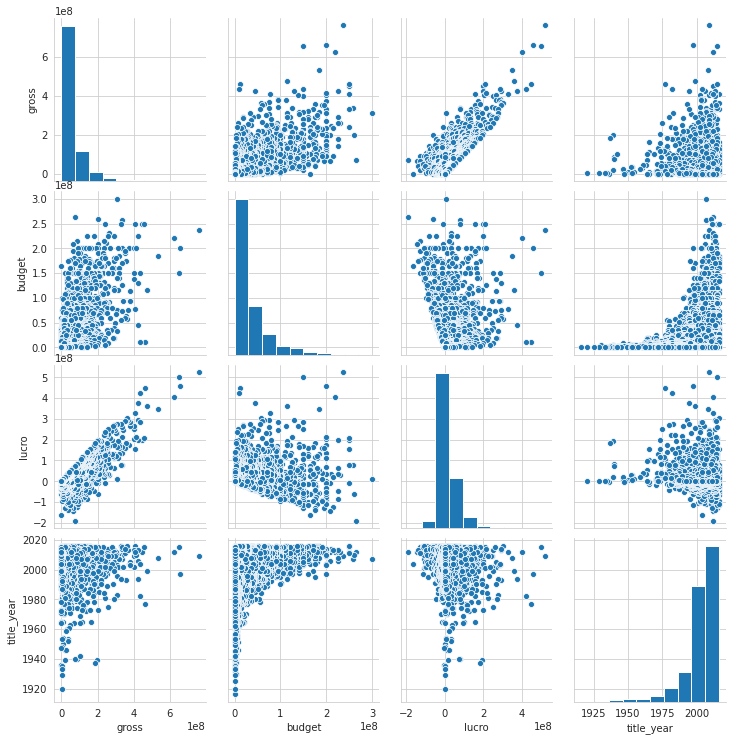

In [91]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

In [92]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.643548,0.800956,0.029693
budget,0.643548,1.000000,0.057187,0.222474
lucro,0.800956,0.057187,1.000000,-0.122240
title_year,0.029693,0.222474,-0.122240,1.000000


#DESAFIO

Calcular a correlaçao somente para os filmes depois de 2000 (jogar fora os de antes de 2000

interpretar essa correção

#DESAFIO

tentar encontrar uma reta, pode ser com uma regua no monitor (não faca isso), com excel/google sheets, com o python, no grafico que parece se aproximar com uma reta (exemplo budgetXlucro)

#DESAFIO

utilizar as notas nas correlações, nos gráficos. Numeros de avaliaçoes por ano pode ser também uma feature.



In [0]:
#ter correção não implica a casualidade
#ter correlaçao nao siginifca que uma variavel implica na outra variavel 
#explorar a causa


#AULA 4

quarentena dados aula 4


In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [94]:
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
       'Q027'],
      dtype='object', length=137)

In [95]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [96]:
#mudar editar ou alterar banco de dados fazendo com que preserva-se os dataset original
colunas_de_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ["ciencias_naturais","ciencias_humanas","linguagem_codigo","matematica","redacao"]
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


#DESAFIO 1

Se a pessoa não teve presença, preencher a nota da pessoa com algum numero. A nota 0? a nota média? a mediana?

In [97]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


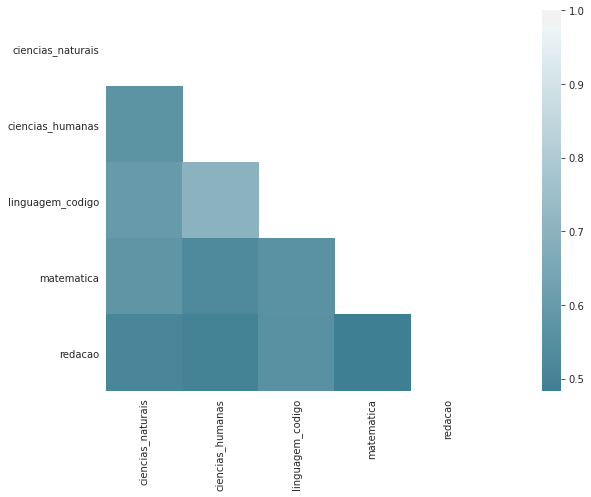

In [98]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=1,
            square=True, linewidths=0, cbar_kws={"shrink": 1})

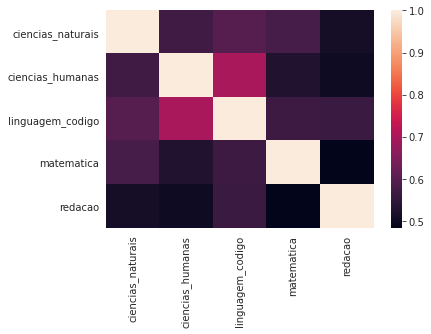

In [99]:
sns.heatmap(corr)

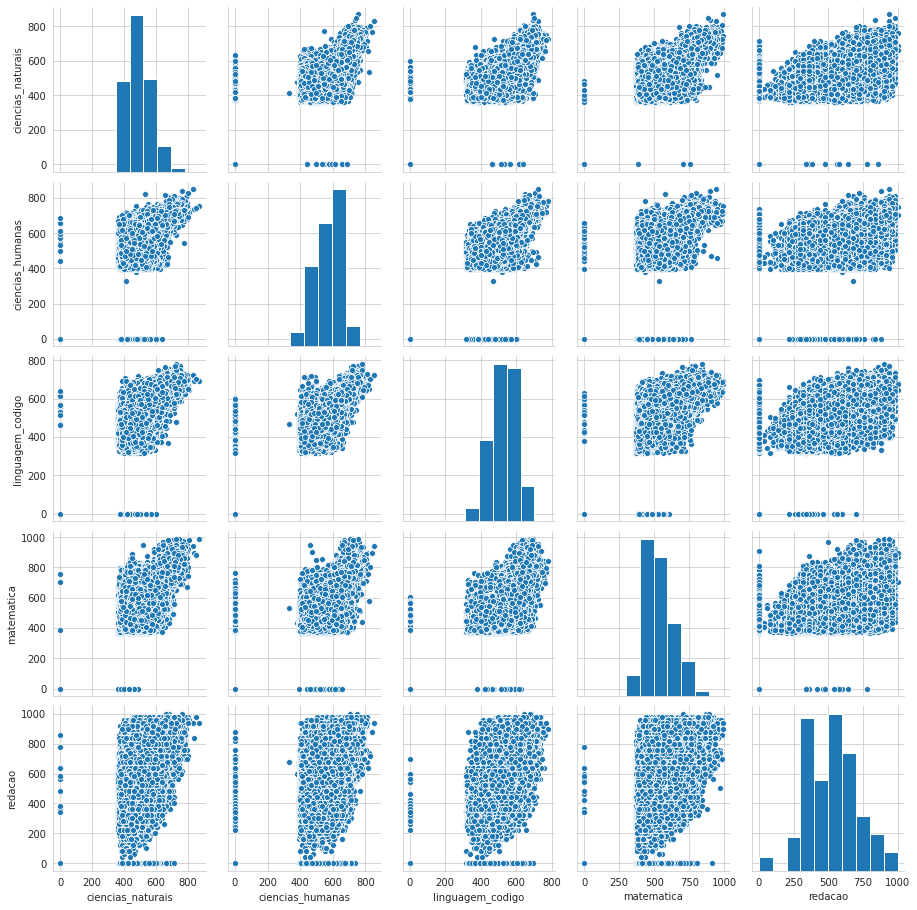

In [100]:
sns.pairplot(dados_notas)

#DASAFIO 2

A matriz de correlação esta feia, deixa ela mais bonita e mandater os valores dentro dela

#DESAFIO 3

Pairplot dos acertos de cada categoria (cn ch mt lc nota pura da redação)

#DESAFIO 4 

remover todos os zeros, caso a pessoa estava presente utilizar o zero se não estiver eleminar.

#DESAFIO 5

qual questões teve mais acertos e quais questoes teve menos erros 
 - creio que isso tem que fazer por tipos de provas pois as questoes mudam de prova para prova.

In [0]:
#dados_notas.query("matematica > 0 and redacao > 0 and .....") para remover todos os zeros
